<a href="https://colab.research.google.com/github/Lordrizal/portofolio/blob/master/project/pa/PA_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

## Text Preprocessing

In [ ]:
import nltk
import pandas as pd
import re
import string


import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
plt.style.use('ggplot')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/Agustus 9_Febuari 13 2020.xlsx")
df.head(2)

link  \
0  https://turnbackhoax.id/2020/08/09/berita-metr...   
1  https://turnbackhoax.id/2020/08/09/salah-kutip...   

                                               title                    tag  \
0  [BERITA] Metro TV: “Mafindo: Perlu Ada Kode Et...  Fitnah / Hasut / Hoax   
1  [SALAH] Kutipan oleh Haedar Nashir “Lebih baik...  Fitnah / Hasut / Hoax   

                                               image             date  \
0  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
1  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   

                                          paragraphs  
0  ['“Mafindo: Perlu Ada Kode Etik Bagi Influence...  
1  ['Kutipan tersebut\npalsu. Dijelaskan bahwa, H...

In [ ]:
df["paragraphs"][1]

"['Kutipan tersebut\\npalsu. Dijelaskan bahwa, Haedar Nashir selaku Ketua Umum PP Muhammadiyah tidak\\npernah mengeluarkan pernyataan sebagaimana yang beredar di media sosial dan\\npesan berantai. Hal tersebut disampaikan melalui suaramuhammadiyah.id, yang di\\nmana Haedar Nashir sendiri merupakan Pemimpin Redaksi di dalamnya.', 'Selengkapnya terdapat\\ndi penjelasan!', 'KATEGORI: IMPOSTER\\nCONTENT', '===', 'SUMBER: MEDIA SOSIAL\\nFACEBOOK', '===', 'NARASI:', 'Lebih baik kita tidak usah mendapat bantuan apapun dari\\nPemerintah daripada setiap lembaga atau AUM yang kita miliki harus membuat\\nBadan Hukum sendiri-sendiri.', 'Kita tidak ingin Muhammadiyah bercerai berai karena Badan Hukum\\nKita lebih tua dari negeri ini', 'Kita terbiasa tidak menerima bantuan dari Pemerintah. Kenapa\\nsekarang jadi cengeng karena tidak menerima bantuan? Sudah Miskinkah Kita?', '===', 'PENJELASAN: Melalui\\nmedia sosial Facebook, akun @IhsanMaarifLubis membagikan tangkapan layar yang\\nberisi kutipan me

In [ ]:
#df['text'][1]

'Kutipan tersebut\\npalsu Dijelaskan bahwa Haedar Nashir selaku Ketua Umum PP Muhammadiyah tidak\\npernah mengeluarkan pernyataan sebagaimana yang beredar di media sosial dan\\npesan berantai Hal tersebut disampaikan melalui suaramuhammadiyahid yang di\\nmana Haedar Nashir sendiri merupakan Pemimpin Redaksi di dalamnya Selengkapnya terdapat\\ndi penjelasan KATEGORI IMPOSTER\\nCONTENT  SUMBER MEDIA SOSIAL\\nFACEBOOK  NARASI Lebih baik kita tidak usah mendapat bantuan apapun dari\\nPemerintah daripada setiap lembaga atau AUM yang kita miliki harus membuat\\nBadan Hukum sendirisendiri Kita tidak ingin Muhammadiyah bercerai berai karena Badan Hukum\\nKita lebih tua dari negeri ini Kita terbiasa tidak menerima bantuan dari Pemerintah Kenapa\\nsekarang jadi cengeng karena tidak menerima bantuan Sudah Miskinkah Kita  PENJELASAN Melalui\\nmedia sosial Facebook akun IhsanMaarifLubis membagikan tangkapan layar yang\\nberisi kutipan mengatasnamakan Ketua Umum PP Muhammadiyah Haedar Nashir Dalam n

In [ ]:
#df['text_bersih'][1]

'kutipan tersebut palsu dijelaskan bahwa haedar nashir selaku ketua umum pp muhammadiyah tidak pernah mengeluarkan pernyataan sebagaimana yang beredar di media sosial dan pesan berantai hal tersebut disampaikan melalui suaramuhammadiyahid yang di mana haedar nashir sendiri merupakan pemimpin redaksi di dalamnya selengkapnya terdapat di penjelasan kategori imposter content sumber media sosial facebook narasi lebih baik kita tidak usah mendapat bantuan apapun dari pemerintah daripada setiap lembaga atau aum yang kita miliki harus membuat badan hukum sendirisendiri kita tidak ingin muhammadiyah bercerai berai karena badan hukum kita lebih tua dari negeri ini kita teiasa tidak menerima bantuan dari pemerintah kenapa sekarang jadi cengeng karena tidak menerima bantuan sudah miskinkah kita penjelasan melalui media sosial facebook akun ihsanmaariflubis membagikan tangkapan layar yang berisi kutipan mengatasnamakan ketua umum pp muhammadiyah haedar nashir dalam narasi yang beredar diklaim bahw

### Explore Data

In [ ]:
def ambil_teks_dalam_kurung(teks):
    pola = r'\[(.*?)\]'  # Pola regex untuk mencocokkan teks di antara tanda kurung siku
    hasil = re.findall(pola, teks)  # Menggunakan re.findall() untuk mencari semua kecocokan dalam teks
    return hasil

teks = '[BERITA] Metro TV: “Mafindo: Perlu Ada Kode Et..'
hasil = ambil_teks_dalam_kurung(teks)
print(hasil)

['BERITA']


In [ ]:
df['label'] = df['title'].apply(ambil_teks_dalam_kurung)
df.head()

link  \
0  https://turnbackhoax.id/2020/08/09/berita-metr...   
1  https://turnbackhoax.id/2020/08/09/salah-kutip...   
2  https://turnbackhoax.id/2020/08/08/salah-video...   
3  https://turnbackhoax.id/2020/08/08/salah-video...   
4  https://turnbackhoax.id/2020/08/08/acara-unlim...   

                                               title                    tag  \
0  [BERITA] Metro TV: “Mafindo: Perlu Ada Kode Et...  Fitnah / Hasut / Hoax   
1  [SALAH] Kutipan oleh Haedar Nashir “Lebih baik...  Fitnah / Hasut / Hoax   
2  [SALAH] Video “Rekaman kamera infrared hantama...  Fitnah / Hasut / Hoax   
3  [SALAH] Video “BERITA TERBARU HARI INI ~ SRI M...  Fitnah / Hasut / Hoax   
4  [ACARA] Unlimited Media Partners: Unlimited Ta...  Fitnah / Hasut / Hoax   

                                               image             date  \
0  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
1  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
2  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   
3  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   
4  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   

                                          paragraphs     label  
0  ['“Mafindo: Perlu Ada Kode Etik Bagi Influence...  [BERITA]  
1  ['Kutipan tersebut\npalsu. Dijelaskan bahwa, H...   [SALAH]  
2  ['Video editan / suntingan. Video itu adalah g...   [SALAH]  
3  ['Tidak ditemukan\npernyataan Menteri Keuangan...   [SALAH]  
4  ['Sabtu, 8 Agustus 2020 15:00-16:00 WIB. Simak...   [ACARA]

In [ ]:
k = set(string.punctuation)-set('\\')
print(k)

{'{', '-', '@', '"', ':', '%', '$', '}', '/', '=', ';', '(', '+', ']', ')', '[', ',', '<', '>', '*', '_', '^', '&', '`', '|', '!', '.', '?', '~', "'", '#'}


In [ ]:
 # Menghapus tanda baca dari judul artikel, kecuali tanda kutip dan tanda petik dua
def punctuation_clean(teks):
  i = 0
  for article in teks:
    punctuation1 = set(string.punctuation).union(set([chr(i) for i in [34, 39, 8216, 8217, 8220, 8221]]))
    exclude_punctuation = (set(punctuation1)-set("\\"))
    article_clean = ''.join(char for char in teks if char not in exclude_punctuation)
    i+=1
    print (str(i) + article_clean)
    return article_clean


df['text'] = df['paragraphs'].apply(punctuation_clean)
#df['label2'] = df['label'].apply(punctuation_clean)
#df.head(5)

1Mafindo Perlu Ada Kode Etik Bagi Influencer Selamat Pagi Indonesia  09 Agustus 2020 095455 Beberapa waktu lalu ramai menjadi pembicaraan soal konten video yang dibuat musisi Anji bersama Hadi Pranoto yang mengklaim menemukan obat herbal covid19 Meski Anji telah meminta maaf atas kegaduhan yang terjadi namun yang menjadi sorotan yakni etika pembuat konten di media sosial Masyarakat Anti Fitnah Indonesia Mafindo berpendapat bahwa perlu adanya kode etik sebagai pedoman bagi para influencer LawanHoax FactCheck DigitalLiteracy
1Kutipan tersebut\npalsu Dijelaskan bahwa Haedar Nashir selaku Ketua Umum PP Muhammadiyah tidak\npernah mengeluarkan pernyataan sebagaimana yang beredar di media sosial dan\npesan berantai Hal tersebut disampaikan melalui suaramuhammadiyahid yang di\nmana Haedar Nashir sendiri merupakan Pemimpin Redaksi di dalamnya Selengkapnya terdapat\ndi penjelasan KATEGORI IMPOSTER\nCONTENT  SUMBER MEDIA SOSIAL\nFACEBOOK  NARASI Lebih baik kita tidak usah mendapat bantuan apapun 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



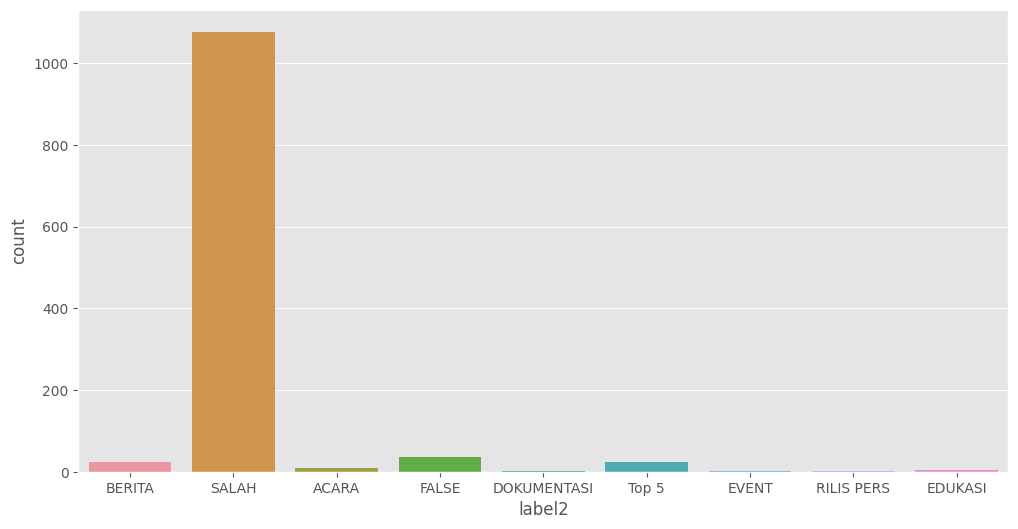

In [ ]:
# Menghitung jumlah sentiment untuk tiap kategori
cm = sns.light_palette("green", as_cmap=True)
sent_count = df.groupby('label2')['text'].count().reset_index().sort_values(by = 'text', ascending = False)
sent_count.style.background_gradient(cmap = 'Purples')

plt.figure(figsize = (12, 6))
sns.countplot(x = 'label2', data = df)
plt.show()

In [ ]:
# untuk menghitung jumlah huruf untuk setiap teks
def char_count(sentence):
  sentence = sentence.replace(" ","")
  return len(sentence)

df['char_count'] = df['text'].apply(char_count)

<ipython-input-9-95a9142f4fcb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'char_count', hue = 'label2', shade = True, data = df)
<ipython-input-9-95a9142f4fcb>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'char_count', hue = 'label2', shade = True, data = df)


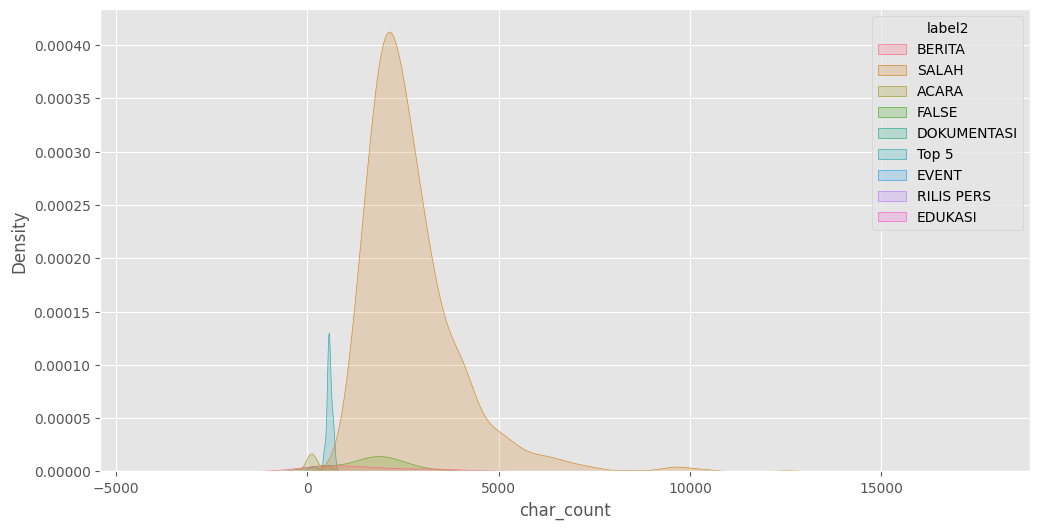

In [ ]:
# Plot distribusi huruf
plt.figure(figsize = (12,6))
sns.kdeplot(x = 'char_count', hue = 'label2', shade = True, data = df)
plt.show()

### Text Claening

In [ ]:

def bersih_bersih(sentence):
  '''Membuat kalimat menjadi huruf kecil semua, menghilangkan clickbait seperti [PROMO], tanggal di awal SMS, jumlah tarif, pulsa'''

  sentence = re.sub(r'REFERENSI', '', sentence)  # Menghapus kata "REFERENSI"
  sentence = sentence.lower()
  sentence = re.sub(r'\\n', ' ', sentence)  # Menghapus newline (\n)


  sentence = re.sub(r'(\[.*?\]|\(.*?\))','',sentence) # Menghilangkan kata-kata dalam kurung

  sentence = re.sub(r'\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.','',sentence) # Menghilangkan format tanggal dan waktu
  sentence = re.sub(r'\d{2}\s\w{3,}\s\d{4}.','', sentence) # Menghilangkan format tanggal "XX NAMA BULAN TAHUN"

  sentence = re.sub(r'(menit|mnt|thn|tahun|minggu|mg|hari|hr|jam|jm|detik|dtk|sekon)*','', sentence) # Menghilangkan satuan waktu
  sentence = re.sub(r'(\d{1,}\s*gb|\d{1,}\s*kb|\d{1,}\s*mb|\d{1,}\s*tb|lte)',"", sentence) # Menghilangkan satuan byte dan kata lte
  sentence = re.sub(r'(ribu|rb|jt|juta|milyar|miliar|triliun|trilyun)',"", sentence) # Menghilangkan satuan uang

  sentence = re.sub(r'\w*\.*\w{1,}\.*\/\w{1,}','',sentence) # Menghilangkan pecahan
  sentence = re.sub(r'rp\s*\d{1,}\s','',sentence) # Menghilangkan jumlah tarif

  sentence = re.sub(r"\*\d{3,}\*\d{3,}\#","", sentence) # Menghilangkan kode aktivasi-1
  sentence = re.sub(r"\*\d{3,}\#","", sentence) # Menghilangkan kode aktivasi-2

  sentence = re.sub(r"https?://\S*|www\.\S+","", sentence) # Menghilangkan web
  sentence = re.sub(r'(\d{1,}\.*\d{0,})','', sentence) # Menghilangkan angka

  sentence = re.sub(r'[\U0001F600-\U0001F6FF]|[\U0001F300-\U0001F5FF]|[\U0001F900-\U0001F9FF]|[\U0001F1E0-\U0001F1FF]|[\U00002600-\U000027BF]|[\U0001F100-\U0001F1FF]|[\U0001F600-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\U0001F1E6-\U0001F1FF]|[\U0001F910-\U0001F96B]|[\U0001F980-\U0001F9E0]',
                    '', sentence)  # Menghilangkan emoticon

  sentence = re.sub(r'https?\S+', '', sentence)  # Menghilangkan URL
  sentence = re.sub(r'https?\S+', '', sentence)  # Menghilangkan URL
  sentence = re.sub(r'\s+', ' ', sentence)  # Mengganti multiple spaces menjadi single space

  sentence = sentence.strip()
  print(sentence + "---------berhasil-----------" + '\n')

  return sentence

In [ ]:
import re


In [ ]:
df['text_bersih'] = df['text'].apply(bersih_bersih)
df.head()

mafindo perlu ada kode etik bagi influencer selamat pagi indonesia beberapa waktu lalu ramai menjadi pembicaraan soal konten video yang dibuat musisi anji bersama hadi pranoto yang mengklaim menemukan obat heal covid meski anji telah meminta maaf atas kegaduhan yang terjadi namun yang menjadi sorotan yakni etika pembuat konten di media sosial masyarakat anti fitnah indonesia mafindo berpendapat bahwa perlu adanya kode etik sebagai pedoman bagi para influencer lawanhoax factcheck digitalliteracy---------berhasil-----------

kutipan tersebut palsu dijelaskan bahwa haedar nashir selaku ketua umum pp muhammadiyah tidak pernah mengeluarkan pernyataan sebagaimana yang beredar di media sosial dan pesan berantai hal tersebut disampaikan melalui suaramuhammadiyahid yang di mana haedar nashir sendiri merupakan pemimpin redaksi di dalamnya selengkapnya terdapat di penjelasan kategori imposter content sumber media sosial facebook narasi lebih baik kita tidak usah mendapat bantuan apapun dari pemer

KeyboardInterrupt: ignored

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
# proses Lemmatizing, yakni proses untuk mengubah kata imbuhan menjadi kata dasarnya
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi Lemmatizer
def lemmatizer(sentence):
  output = stemmer.stem(sentence)
  print(output + "---------berhasil-----------" + '\n')
  return output

df['text_bersih'] = df['text_bersih'].apply(lemmatizer)

mafindo perlu ada kode etik bagi influencer selamat pagi indonesia beberapa waktu lalu ramai jadi bicara soal konten video yang buat musisi anji sama had pranoto yang klaim temu obat heal covid meski anji telah minta maaf atas gaduh yang jadi namun yang jadi sorot yakni etika buat konten di media sosial masyarakat anti fitnah indonesia mafindo dapat bahwa perlu ada kode etik bagai pedoman bagi para influencer lawanhoax factcheck digitalliteracy---------berhasil-----------

kutip sebut palsu jelas bahwa haedar nashir selaku ketua umum pp muhammadiyah tidak pernah keluar nyata bagaimana yang edar di media sosial dan pesan beranta hal sebut sampai lalu suaramuhammadiyahid yang di mana haedar nashir sendiri rupa pimpin redaksi di dalam lengkap dapat di jelas kategori imposter content sumber media sosial facebook narasi lebih baik kita tidak usah dapat bantu apa dari perintah daripada tiap lembaga atau aum yang kita milik harus buat badan hukum sendirisendiri kita tidak ingin muhammadiyah c

In [ ]:
df.head(
)

link  \
0  https://turnbackhoax.id/2020/08/09/berita-metr...   
1  https://turnbackhoax.id/2020/08/09/salah-kutip...   
2  https://turnbackhoax.id/2020/08/08/salah-video...   
3  https://turnbackhoax.id/2020/08/08/salah-video...   
4  https://turnbackhoax.id/2020/08/08/acara-unlim...   

                                               title                    tag  \
0  [BERITA] Metro TV: “Mafindo: Perlu Ada Kode Et...  Fitnah / Hasut / Hoax   
1  [SALAH] Kutipan oleh Haedar Nashir “Lebih baik...  Fitnah / Hasut / Hoax   
2  [SALAH] Video “Rekaman kamera infrared hantama...  Fitnah / Hasut / Hoax   
3  [SALAH] Video “BERITA TERBARU HARI INI ~ SRI M...  Fitnah / Hasut / Hoax   
4  [ACARA] Unlimited Media Partners: Unlimited Ta...  Fitnah / Hasut / Hoax   

                                               image             date  \
0  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
1  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
2  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   
3  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   
4  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 8, 2020   

                                          paragraphs     label  \
0  ['“Mafindo: Perlu Ada Kode Etik Bagi Influence...  [BERITA]   
1  ['Kutipan tersebut\npalsu. Dijelaskan bahwa, H...   [SALAH]   
2  ['Video editan / suntingan. Video itu adalah g...   [SALAH]   
3  ['Tidak ditemukan\npernyataan Menteri Keuangan...   [SALAH]   
4  ['Sabtu, 8 Agustus 2020 15:00-16:00 WIB. Simak...   [ACARA]   

                                                text  label2  char_count  \
0  Mafindo Perlu Ada Kode Etik Bagi Influencer Se...  BERITA         452   
1  Kutipan tersebut\npalsu Dijelaskan bahwa Haeda...   SALAH        1556   
2  Video editan  suntingan Video itu adalah gabun...   SALAH        3865   
3  Tidak ditemukan\npernyataan Menteri Keuangan S...   SALAH        2972   
4  Sabtu 8 Agustus 2020 15001600 WIB Simak di Nar...   ACARA         136   

                                         text_bersih  
0  mafindo perlu ada kode etik bagi influencer se...  
1  kutip sebut palsu jelas bahwa haedar nashir se...  
2  video edit sunting video itu adalah gabung dar...  
3  tidak temu nyata menteri uang sri mulyani tida...  
4  sabtu agustus wib simak di narasumber aribowos...

In [ ]:
#df.to_excel('Hoax_lemmatization.xlsx', index=False)

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/Hoax_lemmatization.xlsx")
df.head(2)

link  \
0  https://turnbackhoax.id/2020/08/09/berita-metr...   
1  https://turnbackhoax.id/2020/08/09/salah-kutip...   

                                               title                    tag  \
0  [BERITA] Metro TV: “Mafindo: Perlu Ada Kode Et...  Fitnah / Hasut / Hoax   
1  [SALAH] Kutipan oleh Haedar Nashir “Lebih baik...  Fitnah / Hasut / Hoax   

                                               image             date  \
0  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   
1  https://turnbackhoax.id/wp-content/uploads/202...  Agustus 9, 2020   

                                          paragraphs       label  \
0  ['“Mafindo: Perlu Ada Kode Etik Bagi Influence...  ['BERITA']   
1  ['Kutipan tersebut\npalsu. Dijelaskan bahwa, H...   ['SALAH']   

                                                text  label2  char_count  \
0  Mafindo Perlu Ada Kode Etik Bagi Influencer Se...  BERITA         452   
1  Kutipan tersebut\npalsu Dijelaskan bahwa Haeda...   SALAH        1556   

                                         text_bersih  
0  mafindo perlu ada kode etik bagi influencer se...  
1  kutip sebut palsu jelas bahwa haedar nashir se...

### Tokenizing

In [ ]:
# fungsi untuk menghitung jumlah frekuensi kata dari suatu kalimat
# Import package yang diperlukan
import nltk
from collections import Counter

nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Fungsi Frekuensi Kata
def word_frequency(sentence, n_gram = 1):
  sentence = " ".join(sentence)
  new_tokens = word_tokenize(sentence)
  counted = Counter(new_tokens)
  word_freq = pd.DataFrame(counted.items(), columns = ['Kata','Frekuensi']).sort_values(by = 'Frekuensi',ascending = False)
  return word_freq

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('punkt')
def token(sentence):
  tokens = word_tokenize(sentence)
  print(str(tokens) + "---------berhasil-----------" + '\n')
  return tokens

df['token'] = df['text_bersih'].apply(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['mafindo', 'perlu', 'ada', 'kode', 'etik', 'bagi', 'influencer', 'selamat', 'pagi', 'indonesia', 'beberapa', 'waktu', 'lalu', 'ramai', 'jadi', 'bicara', 'soal', 'konten', 'video', 'yang', 'buat', 'musisi', 'anji', 'sama', 'had', 'pranoto', 'yang', 'klaim', 'temu', 'obat', 'heal', 'covid', 'meski', 'anji', 'telah', 'minta', 'maaf', 'atas', 'gaduh', 'yang', 'jadi', 'namun', 'yang', 'jadi', 'sorot', 'yakni', 'etika', 'buat', 'konten', 'di', 'media', 'sosial', 'masyarakat', 'anti', 'fitnah', 'indonesia', 'mafindo', 'dapat', 'bahwa', 'perlu', 'ada', 'kode', 'etik', 'bagai', 'pedoman', 'bagi', 'para', 'influencer', 'lawanhoax', 'factcheck', 'digitalliteracy']---------berhasil-----------

['kutip', 'sebut', 'palsu', 'jelas', 'bahwa', 'haedar', 'nashir', 'selaku', 'ketua', 'umum', 'pp', 'muhammadiyah', 'tidak', 'pernah', 'keluar', 'nyata', 'bagaimana', 'yang', 'edar', 'di', 'media', 'sosial', 'dan', 'pesan', 'beranta', 'hal', 'sebut', 'sampai', 'lalu', 'suaramuhammadiyahid', 'yang', 'di', 'ma

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df['token'].tail()

1175    [kait, dengan, efek, pulau, panas, heat, islan...
1176    [beberapa, akun, facebook, bagi, postingan, ya...
1177    [video, yang, unggah, akun, mwr, official, di,...
1178    [periksa, fakta, oleh, anissa, antania, hanjan...
1179    [edar, surat, umum, lelang, jabat, atau, selek...
Name: token, dtype: object

## Image PreProcessing

In [ ]:
# Libraries Used in Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import zipfile, os

In [ ]:
# Generate augmentation image data
aug_rps_train = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)

aug_rps_val = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)



In [ ]:
# Generate data Train and Validation
img_size = (150, 150)
batch_size = 4

train_gen = aug_rps_train.flow_from_directory(
    '/tmp/rockpaperscissors',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=123,
    subset='training'
)

val_gen = aug_rps_val.flow_from_directory(
    '/tmp/rockpaperscissors',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=123,
    subset='validation'
)



In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150,100,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax'),
                                    ])
model.summary()

In [ ]:
import os
import re
import cv2

folder_path = "/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/"  # Ganti dengan path folder tempat gambar-gambar Anda disimpan

# Mengambil daftar nama file gambar dari folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengurutkan file gambar berdasarkan nomor setela h garis strip dalam nama file
image_files.sort(key=lambda x: int(re.search(r"_(\d+)", x).group(1)))

# List untuk menyimpan fitur gambar
image_features = []

# Ekstraksi fitur dari setiap gambar
for image_file in image_files:
  image_path = os.path.join(folder_path, image_file)
  image = cv2.imread(image_path)

# Perkecil ukuran gambar menjadi 256x256 piksel
  resized_image = cv2.resize(image, (256, 256))

  # Ekstraksi fitur dari gambar (misalnya: Histogram warna)
  hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

  # Menyimpan fitur gambar ke dalam list
  image_features.append(hist)
  print(image_path + "---------berhasil-----------" + '\n')

print(image_features)

/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/BERITA Metro TV Mafindo Perlu Ada Kode Etik Bagi Influencer_0.jpg---------berhasil-----------

/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/SALAH Kutipan oleh Haedar Nashir Lebih baik kita tidak usah mendapat bantuan apapun dari Pemerintah_1.jpg---------berhasil-----------

/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/SALAH Video Rekaman kamera infrared hantaman rudal tepat sebelum ledakan dahsyat di Beirut Libanon_2.jpg---------berhasil-----------

/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/SALAH Video BERITA TERBARU HARI INI  SRI MULYANI SUDAH TIDAK SANGGUP LANJUT SERAHKAN TUGASNYA KE RIZAL RAMLI_3.jpg---------berhasil-----------

/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/ACARA Unlimited Media Partners Unlimited Talks Perlukah Kode Etik Bagi I

KeyboardInterrupt: ignored

NameError: ignored

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers


max_len = max([len(s.split()) for s in X_train])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
encoded_docs = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(encoded_docs, maxlen = max_len, padding = 'post')

encoded_docs_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(encoded_docs_test, maxlen = max_len, padding = 'post')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Data teks yang diberikan
data = {
    'Berita': [
        ['mafindo', 'perlu', 'ada', 'kode', 'etik', 'bagi', 'influencer', 'selamat', 'pagi', 'indonesia', 'beberapa', 'waktu', 'lalu', 'ramai', 'jadi', 'bicara', 'soal', 'konten', 'video', 'yang', 'buat', 'musisi', '...', 'indonesia'],
        ['kutip', 'sebut', 'palsu', 'jelas', 'bahwa', 'haedar', 'nashir', 'selaku', 'ketua', 'umum', 'pp', 'muhammadiyah', 'tidak', 'pernah', 'keluar', 'nyata', 'bagaimana', 'yang', 'sekarang', 'jadi', 'cengeng', '...', 'berani']
    ]
}

# Membuat DataFrame dari data teks
df = pd.DataFrame(data)

# Menggabungkan teks menjadi satu dokumen per baris
df['Dokumen'] = df['Berita'].apply(lambda x: ' '.join(x))

# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF dari setiap dokumen
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])

# Mendapatkan daftar kata yang merupakan fitur dari TF-IDF
words = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk menampilkan hasil dalam tabel
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

# Menambahkan kolom indeks
tfidf_df.insert(0, 'Indeks', df.index)

# Menampilkan tabel hasil TF-IDF
print(tfidf_df)

   Indeks       ada  bagaimana      bagi     bahwa  beberapa    berani  \
0       0  0.204071   0.000000  0.204071  0.000000  0.204071  0.000000   
1       1  0.000000   0.218153  0.000000  0.218153  0.000000  0.218153   

     bicara      buat   cengeng  ...     sebut  sekarang    selaku   selamat  \
0  0.204071  0.204071  0.000000  ...  0.000000  0.000000  0.000000  0.204071   
1  0.000000  0.000000  0.218153  ...  0.218153  0.218153  0.218153  0.000000   

       soal     tidak      umum     video     waktu      yang  
0  0.204071  0.000000  0.000000  0.204071  0.204071  0.145198  
1  0.000000  0.218153  0.218153  0.000000  0.000000  0.155218  

[2 rows x 43 columns]


In [ ]:
tfidf_df.head()

Indeks       ada  bagaimana      bagi     bahwa  beberapa    berani  \
0       0  0.204071   0.000000  0.204071  0.000000  0.204071  0.000000   
1       1  0.000000   0.218153  0.000000  0.218153  0.000000  0.218153   

     bicara      buat   cengeng  ...     sebut  sekarang    selaku   selamat  \
0  0.204071  0.204071  0.000000  ...  0.000000  0.000000  0.000000  0.204071   
1  0.000000  0.000000  0.218153  ...  0.218153  0.218153  0.218153  0.000000   

       soal     tidak      umum     video     waktu      yang  
0  0.204071  0.000000  0.000000  0.204071  0.204071  0.145198  
1  0.000000  0.218153  0.218153  0.000000  0.000000  0.155218  

[2 rows x 43 columns]

In [ ]:
import cv2
import numpy as np

# Fungsi untuk melakukan konvolusi pada gambar
def convolution(image, kernel):
    height, width = image.shape
    kernel_size = kernel.shape[0]
    output_size = width - kernel_size + 1
    output = np.zeros(output_size)

    # Melakukan konvolusi
    for i in range(output_size):
        output[i] = np.sum(image[i:i+kernel_size] * kernel)

    return output

# Load gambar menggunakan OpenCV
image_path = '/content/drive/MyDrive/Colab Notebooks/ml_storage/TA/2_gambar_13-02-2020_09-08-2020/ACARA Kenari Djaja Bincang Kenari 5 Turn Back Hoax with MAFINDO_317.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Kernel konvolusi (misalnya kernel edge detection)
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Melakukan konvolusi pada gambar
output = convolution(image, kernel)

# Menampilkan hasil konvolusi
print("Output vektor hasil konvolusi:")
print(output)

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan konvolusi pada gambar dengan kernel 3x3
def konvolusi(gambar, kernel):
    height, width, channels = gambar.shape()
    k_height, k_width = kernel.shape()
    h_pad, w_pad = k_height // 2, k_width // 2
    hasil = np.zeros((height, width, channels))

    for y in range(h_pad, height - h_pad):
        for x in range(w_pad, width - w_pad):
            for c in range(channels):
                # Ambil potongan gambar yang sesuai dengan ukuran kernel
                potongan = gambar[y - h_pad : y + h_pad + 1, x - w_pad : x + w_pad + 1, c]
                # Lakukan operasi konvolusi
                hasil[y, x, c] = np.sum(potongan * kernel)

    return hasil

# Contoh gambar RGB dengan ukuran 48x48 dan nilai piksel random antara 0 dan 255
gambar_rgb = np.random.randint(0, 256, size=(48, 48, 3))

# Contoh kernel konvolusi (3x3) untuk setiap channel warna
kernel = np.array([
    [[0.5, 0, 0.5],
     [0, 1, 0],
     [0.5, 0, 0.5]],

    [[0, 0.5, 0],
     [0.5, 1, 0.5],
     [0, 0.5, 0]],

    [[0.5, 0.5, 0.5],
     [0.5, 1, 0.5],
     [0.5, 0.5, 0.5]]
])

# Lakukan konvolusi pada gambar
hasil_konvolusi = konvolusi(gambar_rgb, kernel)

# Flattening hasil konvolusi menjadi vektor 1 dimensi
vektor_hasil_konvolusi = hasil_konvolusi.flatten()

# Cetak beberapa elemen pertama dari vektor hasil konvolusi
print(vektor_hasil_konvolusi[:50])  # Cetak 50 elemen pertama dari vektor hasil konvolusi


# Github